# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


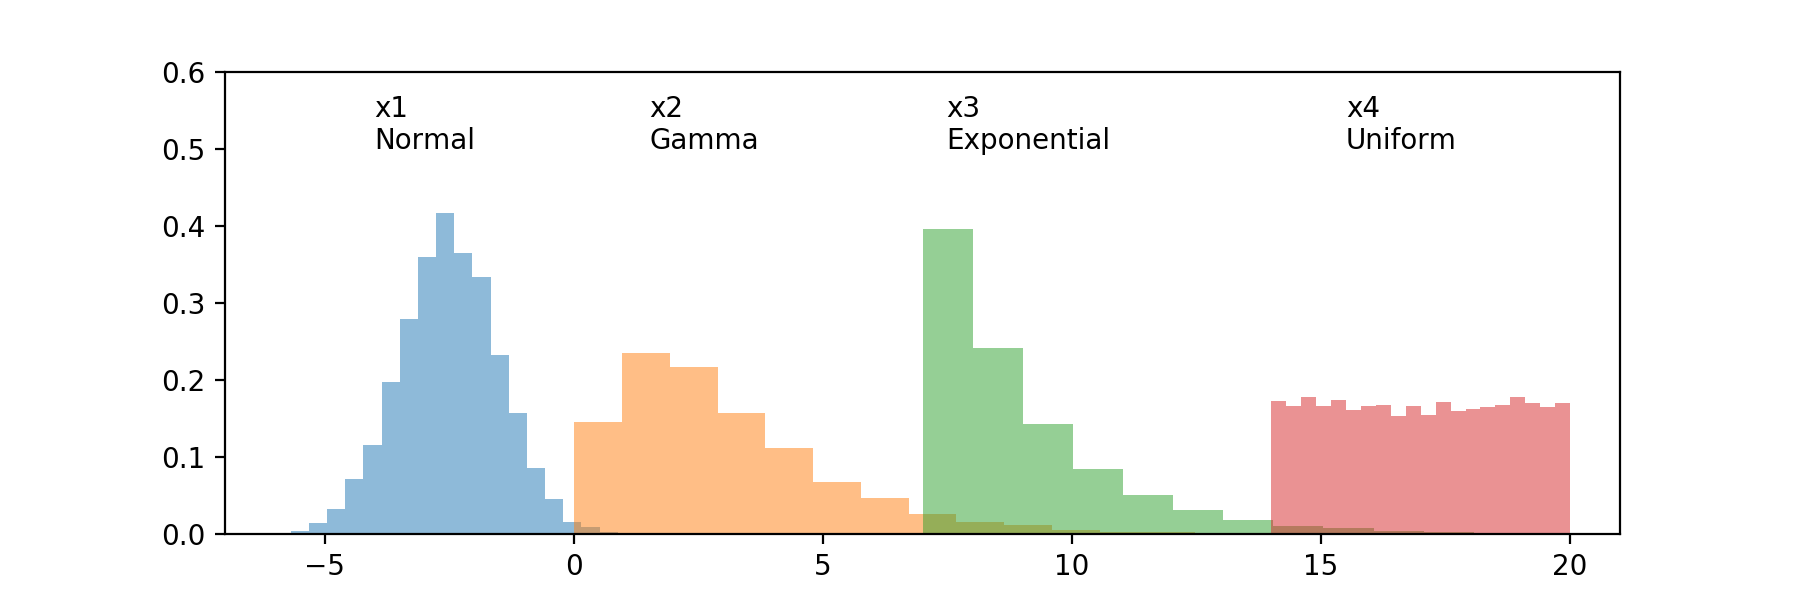

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


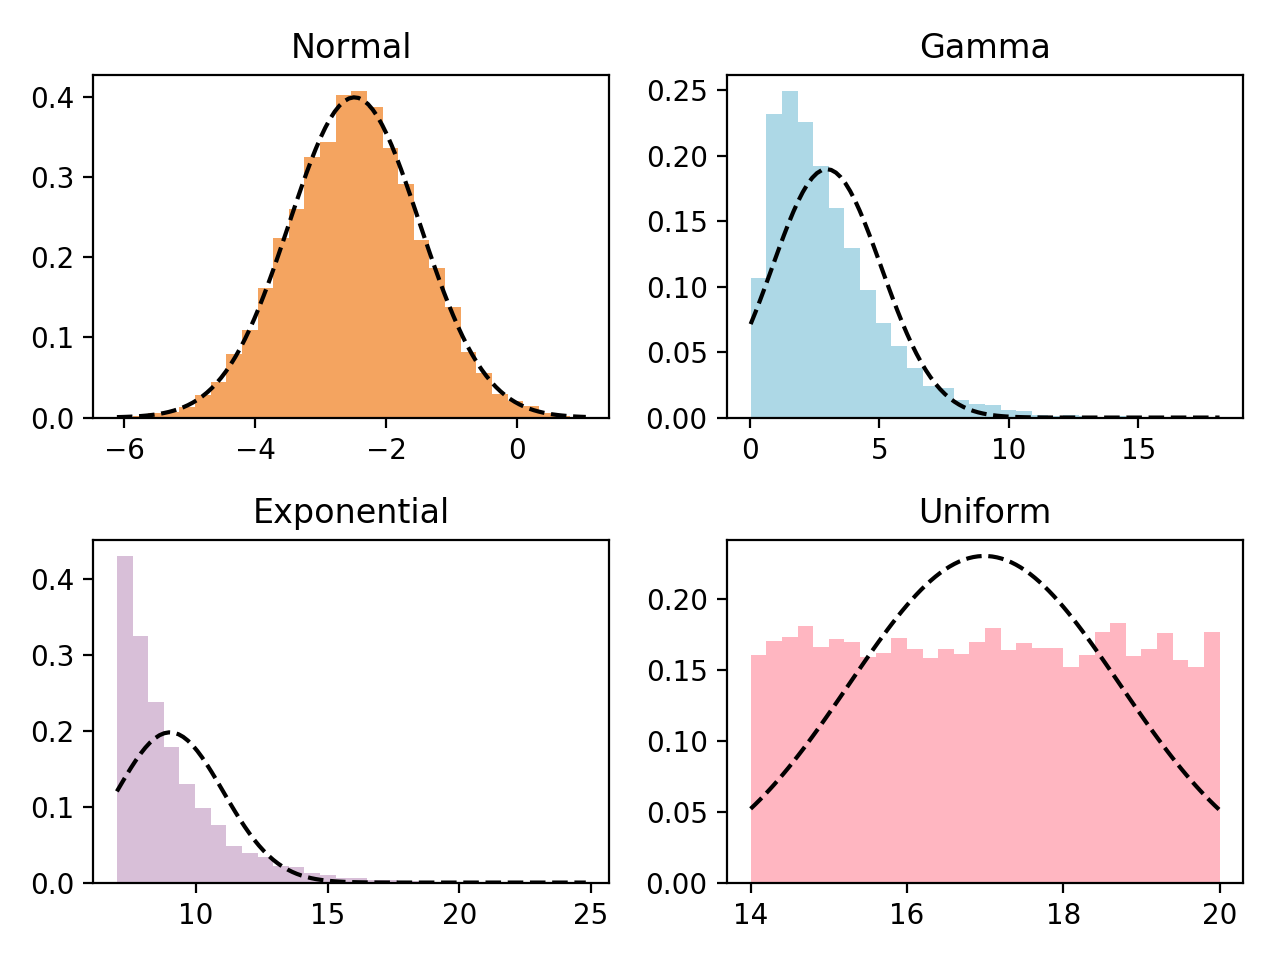

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
#functions of pdf
def pdf_x(x):
    return np.linspace(np.min(x),np.max(x),100)

def pdf_y(x, pdf_x):
    avg = np.mean(x)
    var = np.var(x)
    return 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# get the variables pdfs
pdf_x1 = pdf_x(x1)
pdf_y1 = pdf_y(x1, pdf_x1)
pdf_x2 = pdf_x(x2)
pdf_y2 = pdf_y(x2, pdf_x2)
pdf_x3 = pdf_x(x3)
pdf_y3 = pdf_y(x3, pdf_x3)
pdf_x4 = pdf_x(x4)
pdf_y4 = pdf_y(x4, pdf_x4)

# Then we plot :
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(x1,30,normed=True, color = "sandybrown", lw=0)
axs[0, 0].plot(pdf_x1, pdf_y1, 'k--')
axs[0, 0].set_title('Normal')

axs[0, 1].hist(x2, 30, normed=True, color = "lightblue", lw=0)
axs[0, 1].plot(pdf_x2, pdf_y2, 'k--')
axs[0, 1].set_title('Gamma')

axs[1, 0].hist(x3, 30, normed=True, color = "thistle", lw=0)
axs[1, 0].plot(pdf_x3, pdf_y3, 'k--')
axs[1, 0].set_title('Exponential')

axs[1, 1].hist(x4, 30, normed=True, color = "lightpink", lw=0)
axs[1, 1].plot(pdf_x4, pdf_y4, 'k--')
axs[1, 1].set_title('Uniform')
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()




<IPython.core.display.Javascript object>


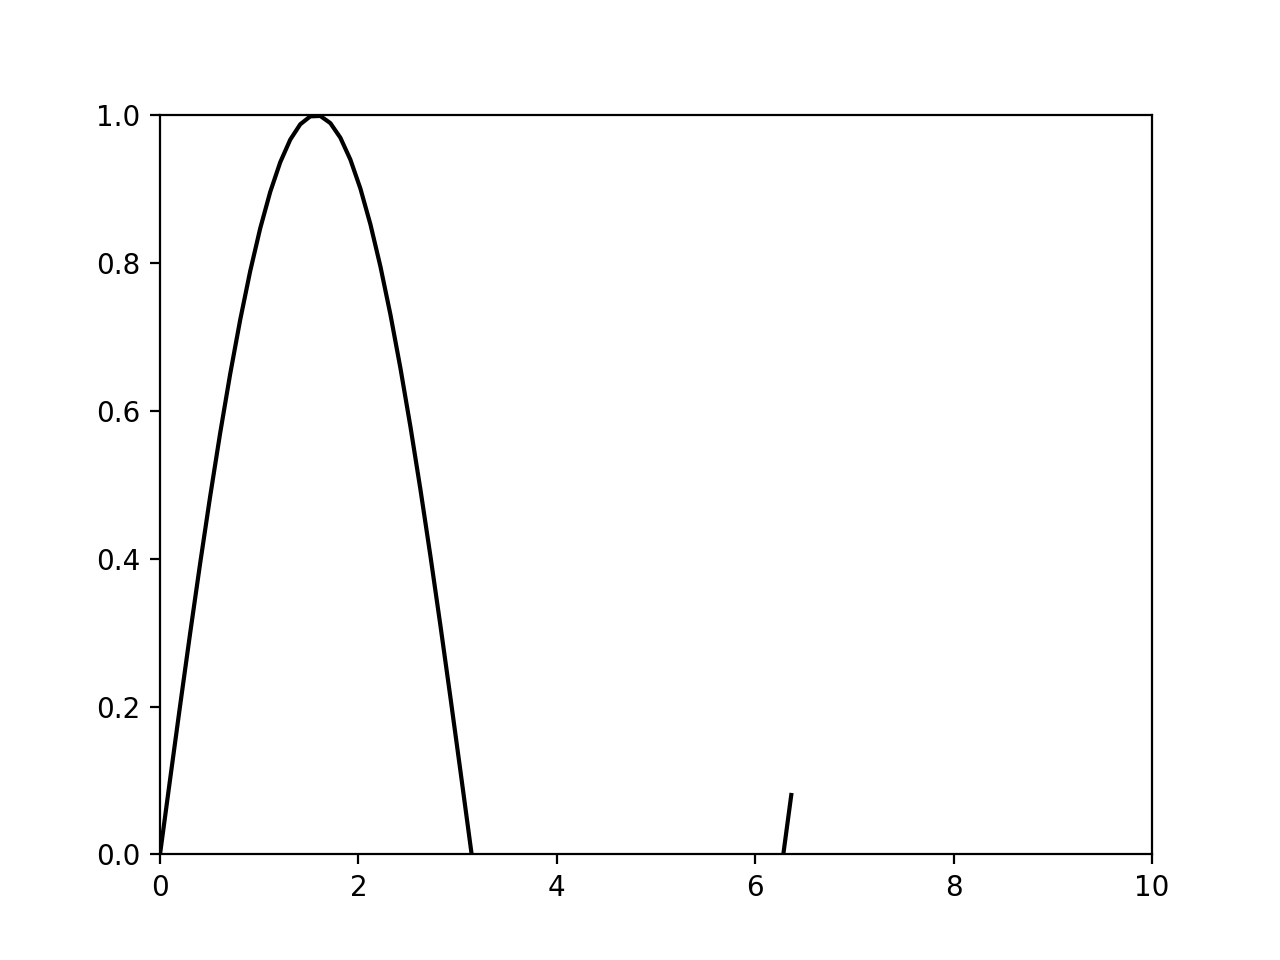

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=100)
plt.show()